In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from configv1 import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | san carlos de bariloche
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | urucara
Processing Record 8 of Set 1 | bambanglipuro
Processing Record 9 of Set 1 | yar-sale
Processing Record 10 of Set 1 | yelizovo
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | gobabis
Processing Record 14 of Set 1 | fayaoue
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | walvis bay
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | tessalit
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1

City not found. Skipping...
Processing Record 40 of Set 4 | charyshskoye
Processing Record 41 of Set 4 | port hawkesbury
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | sirsilla
Processing Record 46 of Set 4 | north branch
Processing Record 47 of Set 4 | abu dhabi
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | canillo
Processing Record 50 of Set 4 | madang
Processing Record 1 of Set 5 | robertsport
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | limon
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | qaqortoq
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 5 | dikson
Processing Record 12 of Set 5 | castro
Processing Record 13 of S

Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | aksu
Processing Record 32 of Set 8 | vysokogornyy
Processing Record 33 of Set 8 | makakilo city
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | lashio
Processing Record 36 of Set 8 | san francisco
Processing Record 37 of Set 8 | manggar
Processing Record 38 of Set 8 | riyadh
Processing Record 39 of Set 8 | balsas
Processing Record 40 of Set 8 | sumbe
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | portales
Processing Record 43 of Set 8 | hambantota
Processing Record 44 of Set 8 | boundiali
Processing Record 45 of Set 8 | kharovsk
Processing Record 46 of Set 8 | inirida
Processing Record 47 of Set 8 | saint-augustin
Processing Record 48 of Set 8 | capreol
Processing Record 49 of Set 8 | brownsville
Processing Record 50 of Set 8 | roma
Processing Record 1 of Set 9 | port lincoln
Processing Record 2 of Set 9 | muros
Processing Record 3 

Processing Record 21 of Set 12 | grand gaube
Processing Record 22 of Set 12 | olafsvik
Processing Record 23 of Set 12 | magnolia
Processing Record 24 of Set 12 | talnakh
Processing Record 25 of Set 12 | eregli
Processing Record 26 of Set 12 | pimenta bueno
Processing Record 27 of Set 12 | ravar
Processing Record 28 of Set 12 | ishigaki
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | nylstroom
City not found. Skipping...
Processing Record 31 of Set 12 | san antonio
Processing Record 32 of Set 12 | fethiye
Processing Record 33 of Set 12 | sioux lookout
Processing Record 34 of Set 12 | cravo norte
Processing Record 35 of Set 12 | makat
Processing Record 36 of Set 12 | banjar
Processing Record 37 of Set 12 | srednekolymsk
Processing Record 38 of Set 12 | tukrah
Processing Record 39 of Set 12 | sandpoint
Processing Record 40 of Set 12 | chitrakonda
Processing Record 41 of Set 12 | xadani
City not found. Skipping...
Processing Record 42 of Set 12 | poum
Pro

In [8]:
len(city_data)

580

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,75.99,94,31,1.99,EC,2021-01-21 01:37:01
1,Hofn,64.2539,-15.2082,32.76,88,73,27.85,IS,2021-01-21 01:37:01
2,Bethel,41.3712,-73.4140,26.60,36,1,8.05,US,2021-01-21 01:34:25
3,San Carlos De Bariloche,-41.1456,-71.3082,73.40,33,0,12.66,AR,2021-01-21 01:32:45
4,Hobart,-42.8794,147.3294,75.99,59,75,10.36,AU,2021-01-21 01:32:56
5,Urucara,-2.5364,-57.7600,71.73,95,69,2.59,BR,2021-01-21 01:37:01
6,Bambanglipuro,-7.9500,110.2833,81.79,77,100,3.56,ID,2021-01-21 01:37:02
7,Yar-Sale,66.8333,70.8333,-25.42,86,100,13.24,RU,2021-01-21 01:37:02
8,Yelizovo,53.1873,158.3805,12.20,67,20,4.47,RU,2021-01-21 01:37:02
9,Bengkulu,-3.8004,102.2655,81.93,70,100,4.38,ID,2021-01-21 01:34:35


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-01-21 01:37:01,-0.7393,-90.3518,75.99,94,31,1.99
1,Hofn,IS,2021-01-21 01:37:01,64.2539,-15.2082,32.76,88,73,27.85
2,Bethel,US,2021-01-21 01:34:25,41.3712,-73.4140,26.60,36,1,8.05
3,San Carlos De Bariloche,AR,2021-01-21 01:32:45,-41.1456,-71.3082,73.40,33,0,12.66
4,Hobart,AU,2021-01-21 01:32:56,-42.8794,147.3294,75.99,59,75,10.36
5,Urucara,BR,2021-01-21 01:37:01,-2.5364,-57.7600,71.73,95,69,2.59
6,Bambanglipuro,ID,2021-01-21 01:37:02,-7.9500,110.2833,81.79,77,100,3.56
7,Yar-Sale,RU,2021-01-21 01:37:02,66.8333,70.8333,-25.42,86,100,13.24
8,Yelizovo,RU,2021-01-21 01:37:02,53.1873,158.3805,12.20,67,20,4.47
9,Bengkulu,ID,2021-01-21 01:34:35,-3.8004,102.2655,81.93,70,100,4.38


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

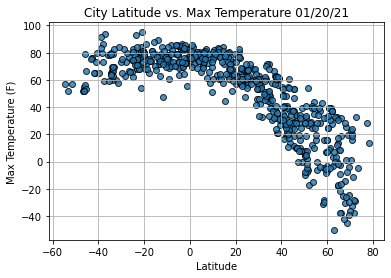

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

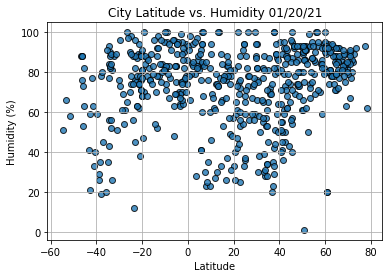

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

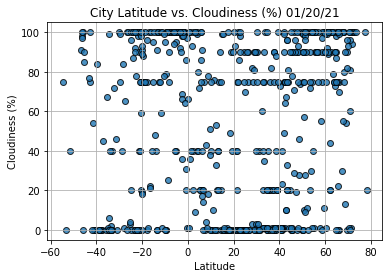

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

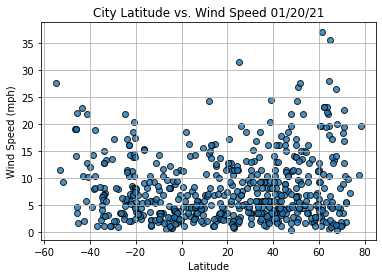

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

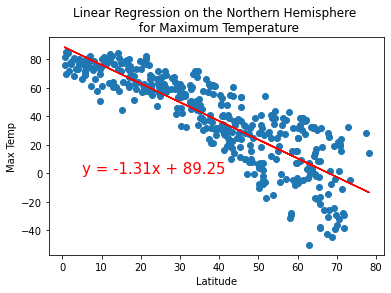

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(5,0))

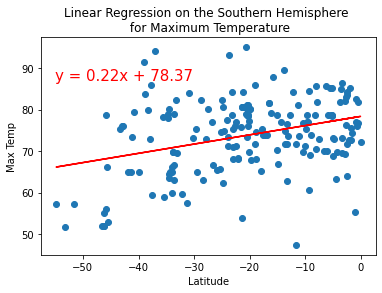

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,87))

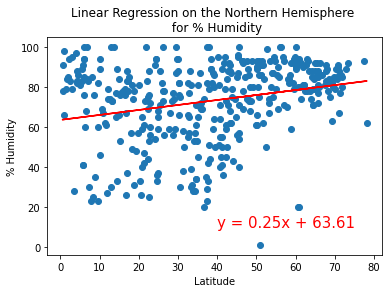

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

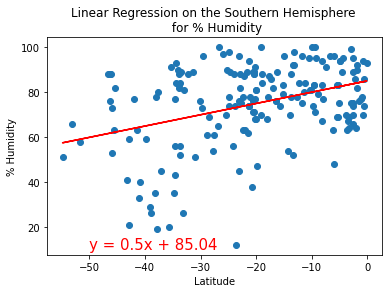

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

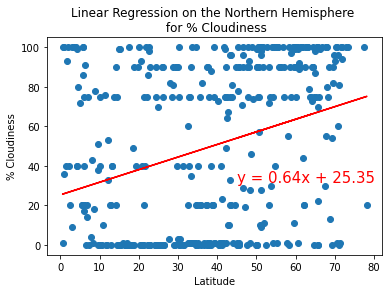

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,32))

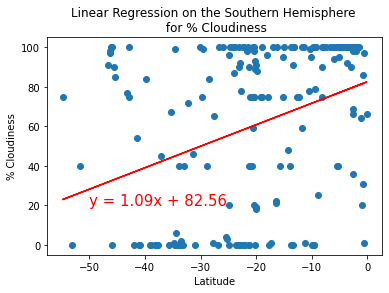

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,20))

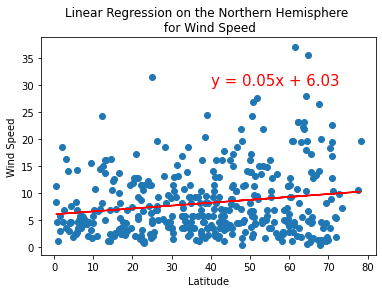

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

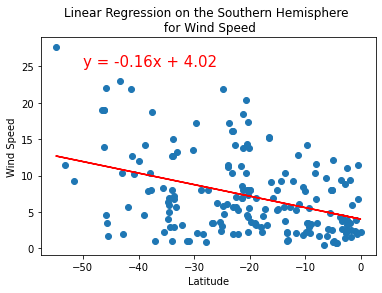

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))